In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
warnings.filterwarnings("ignore")

2.1. Описание используемого датасета

2.1.1. Источник и структура данных

In [2]:
df = pd.read_csv('Covid data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

Исходный набор данных состоит из 21 уникального признака и 1 048 576 уникальных пациентов.

In [4]:
print("Размер датасета: ",df.shape)
df.head()

Размер датасета:  (1048575, 21)


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [5]:
print("Количество пустых ячеек: ", df.isna().sum().sum())

Количество пустых ячеек:  0


2.1.2.	Основные переменные и признаки, представленные в наборе данных.

В логических признаках 1 означает "да", а 2 - "нет". значения 97 и 99 являются недостающими данными.

In [6]:
print("Количество уникальных значений в каждой колонке:")
df.nunique()

Количество уникальных значений в каждой колонке:


USMER                     2
MEDICAL_UNIT             13
SEX                       2
PATIENT_TYPE              2
DATE_DIED               401
INTUBED                   4
PNEUMONIA                 3
AGE                     121
PREGNANT                  4
DIABETES                  3
COPD                      3
ASTHMA                    3
INMSUPR                   3
HIPERTENSION              3
OTHER_DISEASE             3
CARDIOVASCULAR            3
OBESITY                   3
RENAL_CHRONIC             3
TOBACCO                   3
CLASIFFICATION_FINAL      7
ICU                       4
dtype: int64

sex: 1 for female and 2 for male.

age: of the patient.

classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.

patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.

pneumonia: whether the patient already have air sacs inflammation or not.

pregnancy: whether the patient is pregnant or not.

diabetes: whether the patient has diabetes or not.

copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.

asthma: whether the patient has asthma or not.

inmsupr: whether the patient is immunosuppressed or not.

hypertension: whether the patient has hypertension or not.

cardiovascular: whether the patient has heart or blood vessels related disease.

renal chronic: whether the patient has chronic renal disease or not.

other disease: whether the patient has other disease or not.

obesity: whether the patient is obese or not.

tobacco: whether the patient is a tobacco user.

usmr: Indicates whether the patient treated medical units of the first, second or third level.

medical unit: type of institution of the National Health System that provided the care.

intubed: whether the patient was connected to the ventilator.

icu: Indicates whether the patient had been admitted to an Intensive Care Unit.

date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.

Как уже упоминалось в данных, значения 97, 98 и 99 являются нашими нулевыми значениями. В будущем мы объединим их в одно значение.

In [7]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

2    662903
1    385672
Name: USMER, dtype: int64


12    602995
4     314405
6      40584
9      38116
3      19175
8      10399
10      7873
5       7244
11      5577
13       996
7        891
2        169
1        151
Name: MEDICAL_UNIT, dtype: int64


1    525064
2    523511
Name: SEX, dtype: int64


1    848544
2    200031
Name: PATIENT_TYPE, dtype: int64


9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: DATE_DIED, Length: 401, dtype: int64


97    848544
2     159050
1      33656
99      7325
Name: INTUBED, dtype: int64


2     892534
1     140038
99     16003
Name: PNEUMONIA, dtype: int64


30     27010
31     25927
28     25313
29     25134
34     24872
       ...  
114        2
116        2
111        1
121        1
113        1
Name: AGE, Length: 121, dtype: int64


97    523511
2     51317

Вывод:

1. У нас есть некоторые признаки, которые, как мы ожидаем, будут иметь всего 2 уникальных значения, но мы видим, что у этих признаков есть 3 или 4 уникальных значения. Например, функция "ПНЕВМОНИЯ" имеет 3 уникальных значения (1,2,99). 99 представляет собой значения NaN. Следовательно, мы оставим только строки, содержащие значения 1 и 2.

2. В столбце "DATE_DIED" у нас есть 971633 значения "9999-99-99", которые означают живых пациентов, поэтому позже мы превратим столбец "DATE_DIED" в "DEATH". Он будет содержать всего 2 значения (1 или 2) и показывать, умер пациент или нет.

2.2.	Предобработка данных

2.2.1.	Очистка данных

Анализ значений признака "INTUBED" 

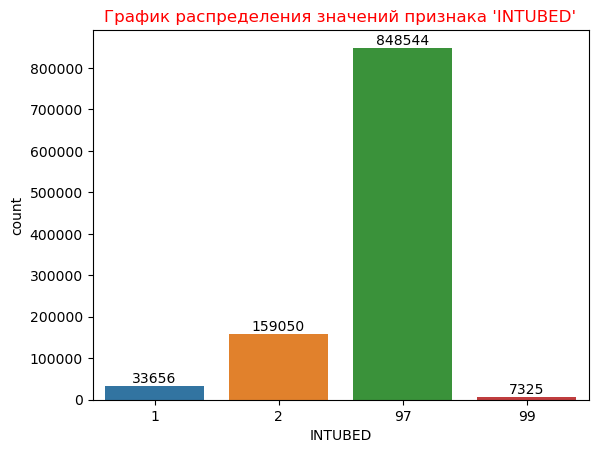

In [8]:
ax = sns.countplot(df.INTUBED)
plt.bar_label(ax.containers[0])
plt.title("График распределения значений признака 'INTUBED'", color = 'red');

Анализ значений признака "ICU"

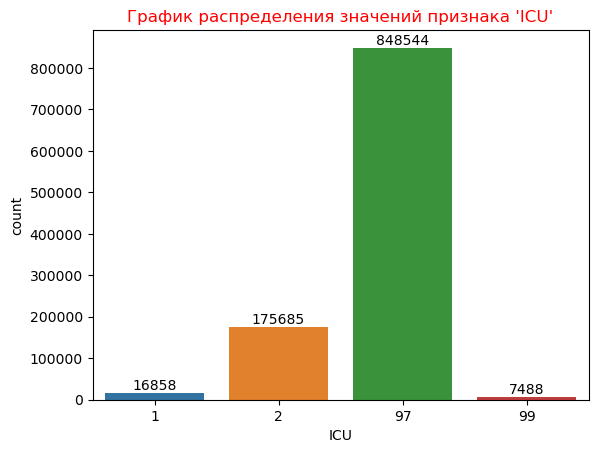

In [9]:
ax = sns.countplot(df.ICU)
plt.bar_label(ax.containers[0])
plt.title("График распределения значений признака 'ICU'", color = 'red');

Вывод:

В  "INTUBED" и "ICU" слишком много пропущенных значений, поэтому я их удалю. Пропуски делают эти признаки бесполезными для анализа и прогнозирования, так как информации недостаточно для выявления закономерностей.

In [10]:
columns_to_drop = ["INTUBED", "ICU"]
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

2.2.2.	Преобразование данных

In [11]:
df = df[(df.PNEUMONIA == 1) | (df.PNEUMONIA == 2)]
df = df[(df.DIABETES == 1) | (df.DIABETES == 2)]
df = df[(df.COPD == 1) | (df.COPD == 2)]
df = df[(df.ASTHMA == 1) | (df.ASTHMA == 2)]
df = df[(df.INMSUPR == 1) | (df.INMSUPR == 2)]
df = df[(df.HIPERTENSION == 1) | (df.HIPERTENSION == 2)]
df = df[(df.OTHER_DISEASE == 1) | (df.OTHER_DISEASE == 2)]
df = df[(df.CARDIOVASCULAR == 1) | (df.CARDIOVASCULAR == 2)]
df = df[(df.OBESITY == 1) | (df.OBESITY == 2)]
df = df[(df.RENAL_CHRONIC == 1) | (df.RENAL_CHRONIC == 2)]
df = df[(df.TOBACCO == 1) | (df.TOBACCO == 2)]

In [12]:
df["DEATH"] = [2 if each=="9999-99-99" else 1 for each in df.DATE_DIED]

In [13]:
columns_to_drop = ["DATE_DIED"]
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

Как упоминалось ранее, в колонках мы оставили только значения 1 или 2, так как значения 97, 98 и 99 являются нулевыми. 

Столбец "DEATH" после преобразования также содержит всего 2 значения: 1 и 2 и показывает, жив ли пациент.

Столбец "DATE_DIED" больше не нужен, так как мы заменили его на "DEATH"

Мы видим, что все значения "97"(нет беременности) относятся к мужчинам, поэтому мы преобразуем 97 в 2.

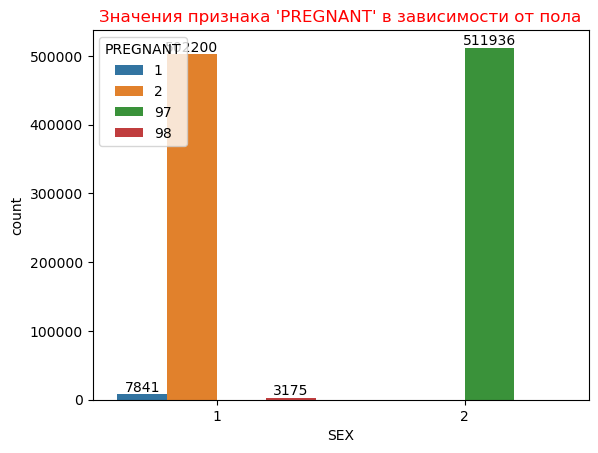

In [14]:
plt.figure()
ax = sns.countplot(df.SEX, hue = df.PREGNANT)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Значения признака 'PREGNANT' в зависимости от пола",color="red");

In [15]:
df.PREGNANT = df.PREGNANT.replace(97,2)
df = df[(df.PREGNANT == 1) | (df.PREGNANT == 2)]

Как мы видим, у нас есть только один числовой признак, который называется "ВОЗРАСТ", остальные являются категориальными.

Это значит, что данные преобразованы успешно. Можно переходить к визуализации.

In [16]:
print("Количество уникальных значений в каждой колонке:")
df.nunique()

Количество уникальных значений в каждой колонке:


USMER                     2
MEDICAL_UNIT             13
SEX                       2
PATIENT_TYPE              2
PNEUMONIA                 2
AGE                     121
PREGNANT                  2
DIABETES                  2
COPD                      2
ASTHMA                    2
INMSUPR                   2
HIPERTENSION              2
OTHER_DISEASE             2
CARDIOVASCULAR            2
OBESITY                   2
RENAL_CHRONIC             2
TOBACCO                   2
CLASIFFICATION_FINAL      7
DEATH                     2
dtype: int64

In [17]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,DEATH
0,2,1,1,1,1,65,2,2,2,2,2,1,2,2,2,2,2,3,1
1,2,1,2,1,1,72,2,2,2,2,2,1,2,2,1,1,2,5,1
2,2,1,2,2,2,55,2,1,2,2,2,2,2,2,2,2,2,3,1
3,2,1,1,1,2,53,2,2,2,2,2,2,2,2,2,2,2,7,1
4,2,1,2,1,2,68,2,1,2,2,2,1,2,2,2,2,2,3,1


2.3.	Анализ данных с использованием Python

2.3.1. Визуализация данных

Значения в целевом столбце распределены неравномерно.

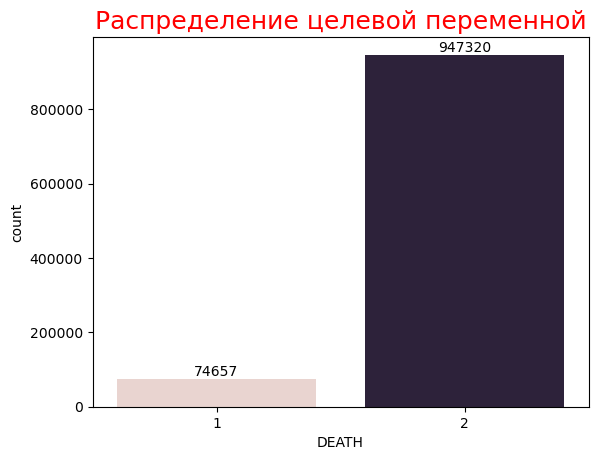

In [20]:
ax = sns.countplot(df.DEATH,palette=sns.cubehelix_palette(2))
plt.bar_label(ax.containers[0])
plt.title("Распределение целевой переменной", fontsize=18,color="red");

Возраст пациентов составляет примерно от 20 до 60 лет.

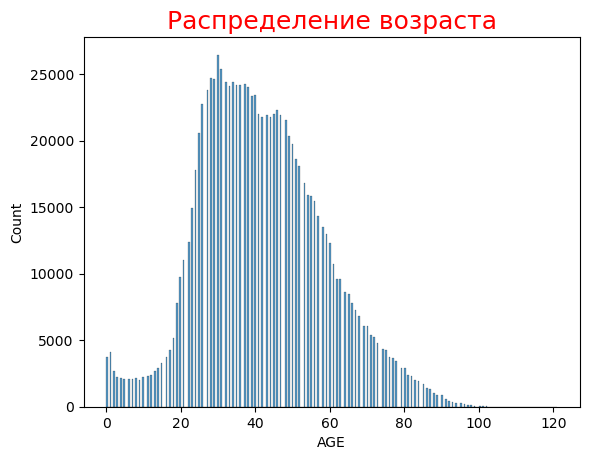

In [21]:
sns.histplot(x=df.AGE)
plt.title("Распределение возраста", color="red", fontsize=18);

Пожилые пациенты с большей вероятностью умирают по сравнению с молодыми.

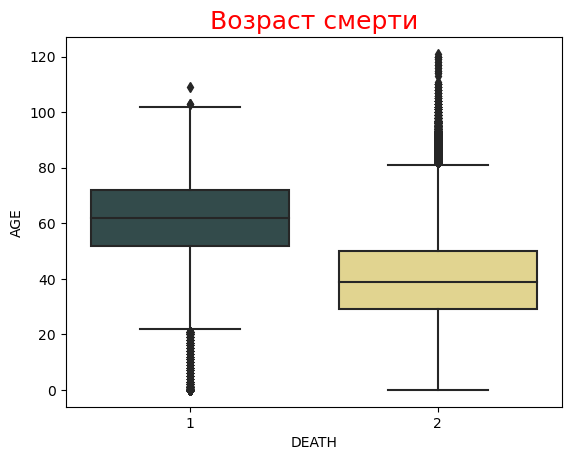

In [22]:
sns.boxplot(x="DEATH", y="AGE",data=df,palette=sns.color_palette(["#2f4f4f","#eedd82"]))
plt.title("Возраст смерти",fontsize=18, color="red");

Мужчины чаще умирают от COVID-19 по сравнению с женщинами.

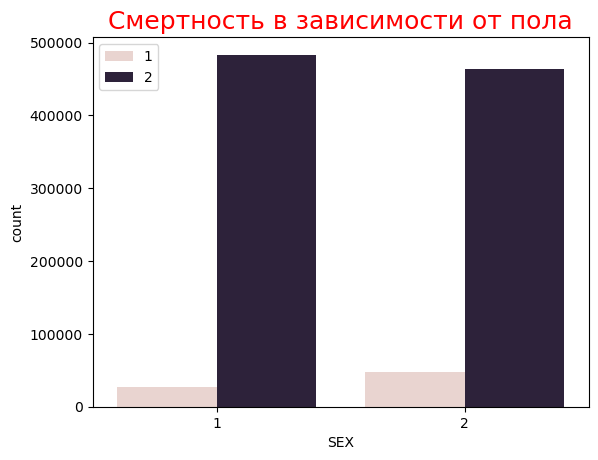

In [23]:
sns.countplot(df.SEX,hue=df.DEATH, palette=sns.cubehelix_palette(2))
plt.title("Смертность в зависимости от пола",fontsize=18, color="red")
plt.legend(loc="best");

Пациенты с ожирением чаще умирают от COVID-19 по сравнению с пациентами, не страдающими ожирением.

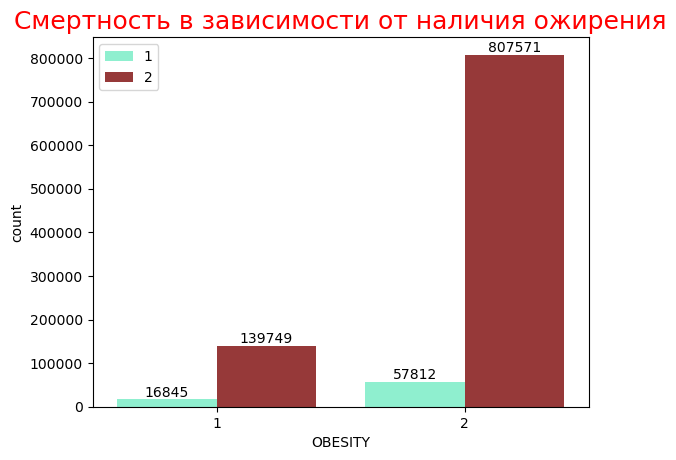

In [24]:
ax=sns.countplot(df.OBESITY,hue=df.DEATH, palette=sns.color_palette(["#7fffd4","#a52a2a"]))
plt.title("Смертность в зависимости от наличия ожирения",fontsize=18, color="red")
plt.bar_label(ax.containers[0])
plt.bar_label(ax.containers[1])
plt.legend(loc="best");

Госпитализированные имеют более высокие шансы на выживание

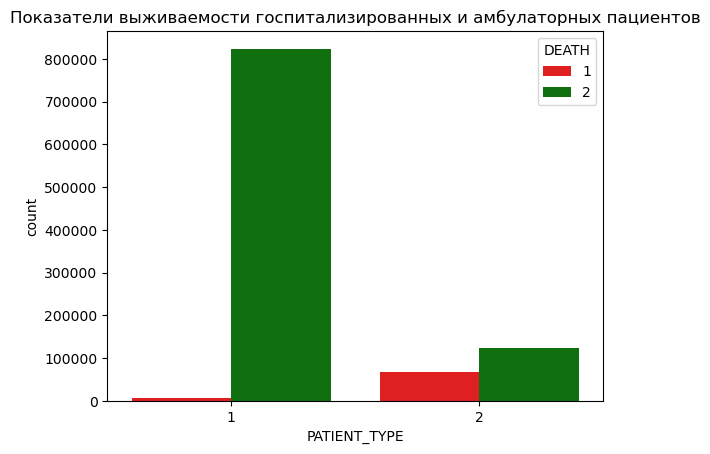

In [45]:
plt.figure()
sns.countplot(x=df.PATIENT_TYPE,hue=df.DEATH,palette=["red","green"]).set(title="Показатели выживаемости госпитализированных и амбулаторных пациентов")
plt.show()

2.3.2. Выявление признаков с низкой корреляцией

Построим матрицу корреляции

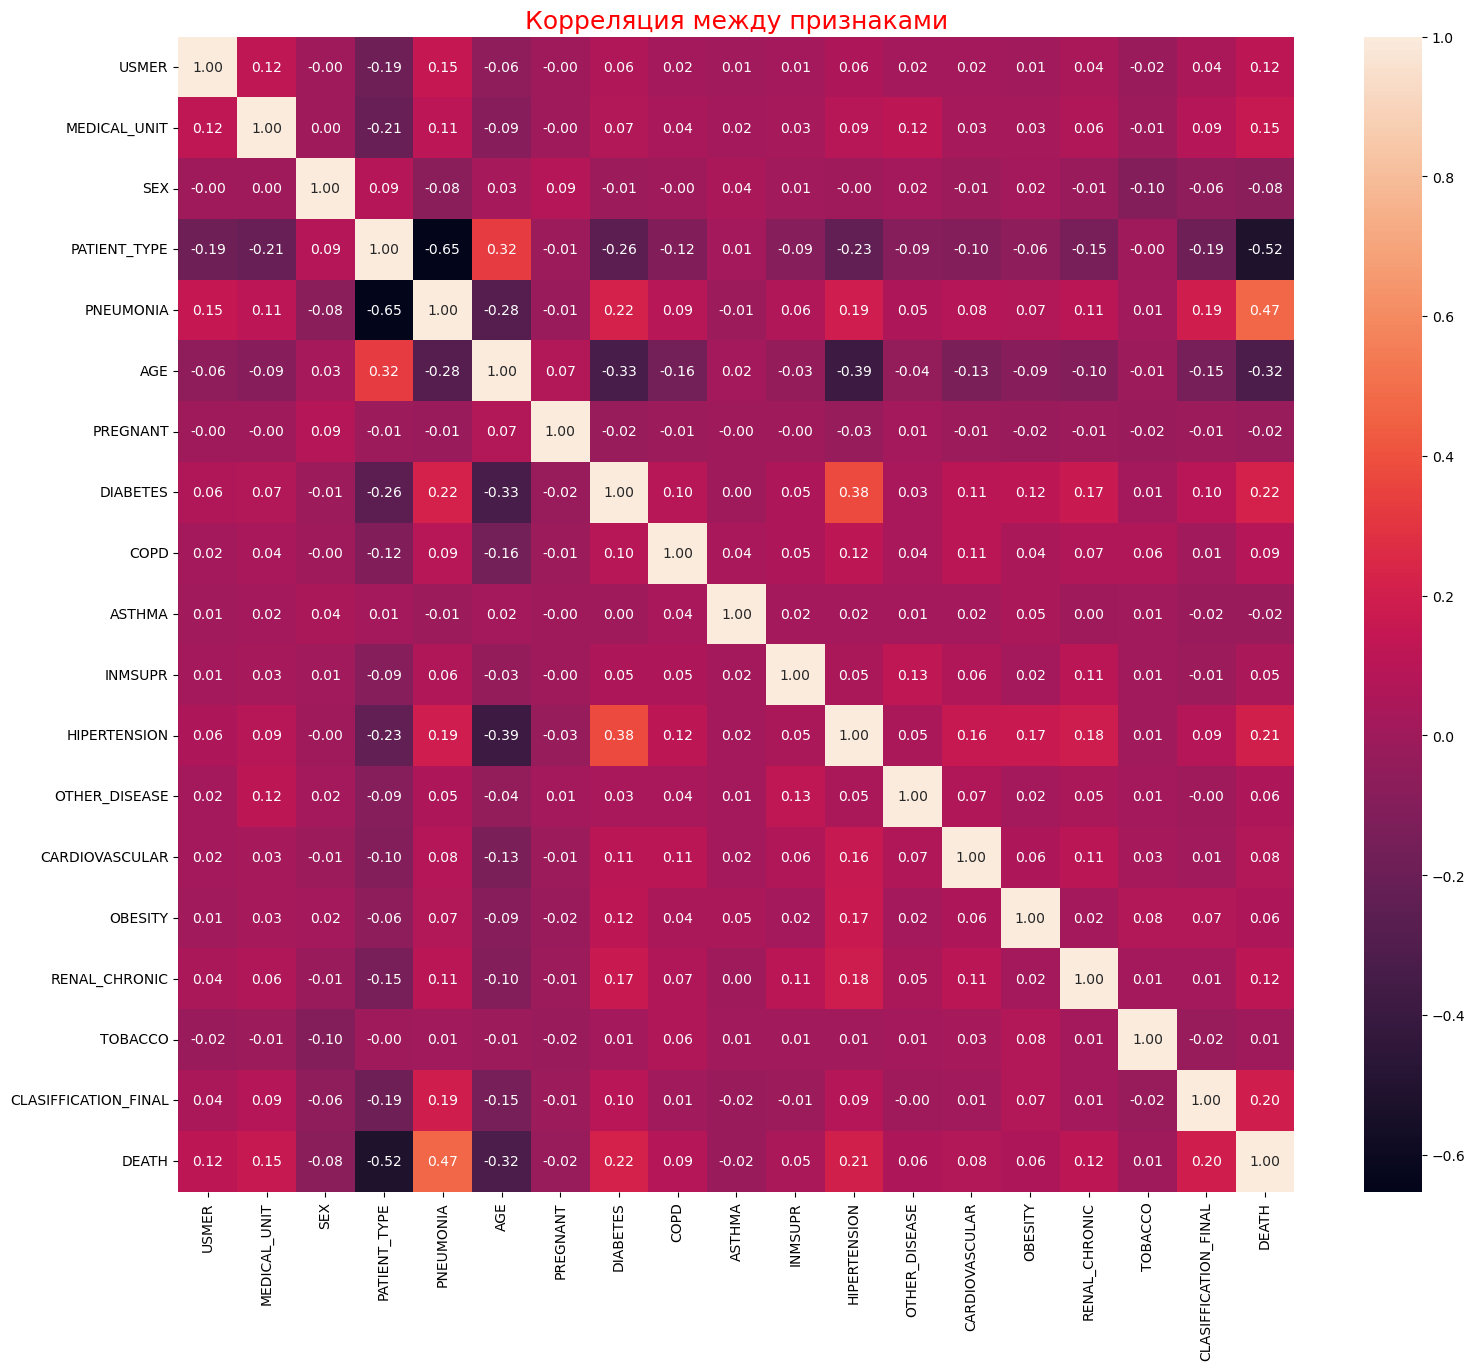

In [26]:
plt.figure(figsize=(18,15))
sns.heatmap(df.corr(),annot=True, fmt=".2f")
plt.title("Корреляция между признаками",fontsize=18,color="red");

Удаляем признаки, которые имеют низкую корреляцию с признаком "DEATH"

In [27]:
unrelevant_columns = ["SEX","PREGNANT","COPD","ASTHMA","INMSUPR","OTHER_DISEASE","CARDIOVASCULAR",
                      "OBESITY","TOBACCO"]

df.drop(columns=[col for col in unrelevant_columns if col in df.columns], inplace=True)

In [28]:
df.head()

,USMER,MEDICAL_UNIT,PATIENT_TYPE,PNEUMONIA,AGE,DIABETES,HIPERTENSION,RENAL_CHRONIC,CLASIFFICATION_FINAL,DEATH
0,2,1,1,1,65,2,1,2,3,1
1,2,1,1,1,72,2,1,1,5,1
2,2,1,2,2,55,1,2,2,3,1
3,2,1,1,2,53,2,2,2,7,1
4,2,1,1,2,68,1,1,2,3,1


2.3.3. Кодирование категорий и нормализация признаков

Кодирование категориальных признаков

In [29]:
df = pd.get_dummies(df,columns=["MEDICAL_UNIT","CLASIFFICATION_FINAL"],drop_first=True)

Масштабирование числовых данных. Признак AGE нормализуется с помощью RobustScaler, что уменьшает влияние выбросов и приводит данные к сопоставимому масштабу

In [30]:
scaler = RobustScaler()
df.AGE = scaler.fit_transform(df.AGE.values.reshape(-1,1))

2.4.	Построение прогноза заболеваемости COVID-19

2.4.1.	Разделение данных на обучающую и тестовую выборки

In [31]:
x = df.drop(columns="DEATH")
y = df["DEATH"]

In [32]:
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.2, random_state=42)
print("Train_x :",train_x.shape)
print("Test_x :",test_x.shape)
print("Train_y :",train_y.shape)
print("Test_y :",test_y.shape)

Train_x : (817581, 25)
Test_x : (204396, 25)
Train_y : (817581,)
Test_y : (204396,)


2.4.2.	Выбор модели машинного обучения

Логистическая регрессия хорошо подходит для задач классификации. В данном случае цель — предсказать вероятность принадлежности объекта к одному из двух классов (жив/умер).

2.4.3.	Обучение модели и прогнозирование

In [33]:
logreg = LogisticRegression()
logreg.fit(train_x,train_y)
print("Logistic Regression Accuracy :",logreg.score(test_x, test_y))

Logistic Regression Accuracy : 0.9393823753889509


In [34]:
print("Logistic Regression F1 Score :",f1_score(test_y,logreg.predict(test_x),average=None))

Logistic Regression F1 Score : [0.52006508 0.9676481 ]


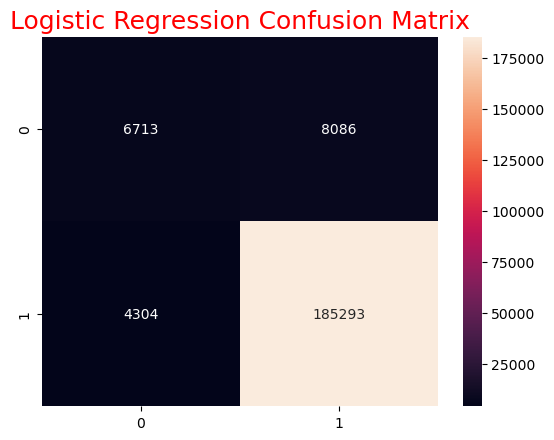

In [35]:
sns.heatmap(confusion_matrix(test_y, logreg.predict(test_x)), annot=True, fmt=".0f")
plt.title("Logistic Regression Confusion Matrix",fontsize=18, color="red");

Вывод:

Мы получили хороший показатель accuracy с моделью логистической регрессии. Но мы должны проверить другие показатели.

Когда мы смотрим на F1, он показывает, что мы предсказали хорошие результаты для пациентов, которые выжили, но мы не можем сказать того же о погибших пациентах.

Также можно заметить это, смотря на Confusion Matrix. Эта проблема возникла из-за того, что целевая переменная распределена неравномерно.

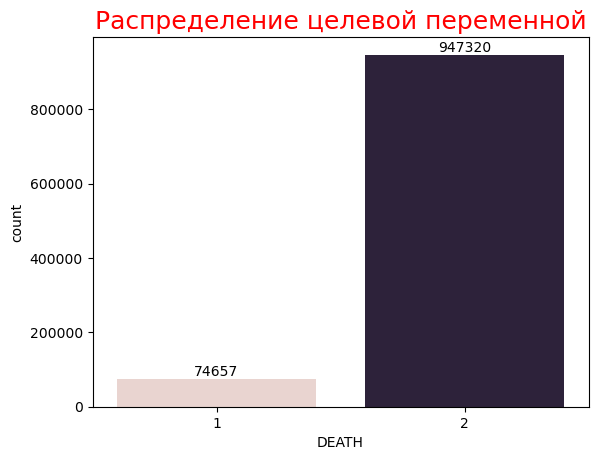

In [36]:
ax = sns.countplot(df.DEATH,palette=sns.cubehelix_palette(2))
plt.bar_label(ax.containers[0])
plt.title("Распределение целевой переменной", fontsize=18,color="red");

2.4.4.	Решение проблемы дисбаланса классов

Метод Undersampling решит проблему дисбаланса. Мы уменьшим число записей в датасете и сделаем равным количество значений класса 1 и класса 2.

In [37]:
rus = RandomUnderSampler(random_state=0)
x_resampled,y_resampled = rus.fit_resample(x,y)

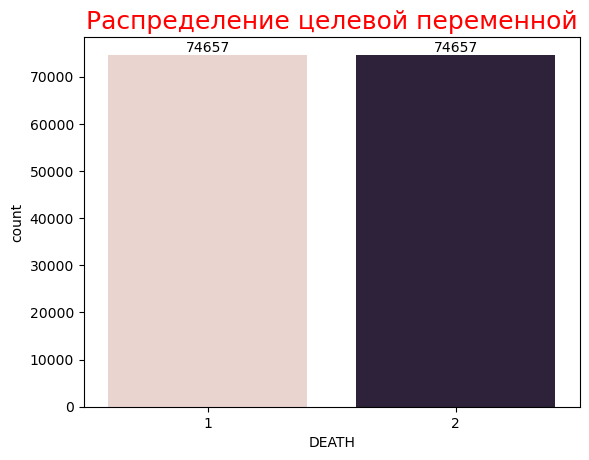

In [38]:
ax = sns.countplot(y_resampled, palette=sns.cubehelix_palette(2))
plt.bar_label(ax.containers[0])
plt.title("Распределение целевой переменной", fontsize=18,color="red");

Обучим модель заново после применения Undersampling

In [39]:
train_x, test_x, train_y, test_y = train_test_split(x_resampled,y_resampled, test_size=0.2, random_state=42)
print("Train_x :",train_x.shape)
print("Test_x :",test_x.shape)
print("Train_y :",train_y.shape)
print("Test_y :",test_y.shape)

Train_x : (119451, 25)
Test_x : (29863, 25)
Train_y : (119451,)
Test_y : (29863,)


In [40]:
logreg = LogisticRegression()
logreg.fit(train_x,train_y)

LogisticRegression()

2.5.	Оценка моделей и их точности

Accuracy, F1-score, и ROC-AUC вместе дают комплексное представление о работе модели. Поэтому оценим обученную модель с их помощью.

In [41]:
print("Logistic Regression Accuracy :",logreg.score(test_x, test_y))

Logistic Regression Accuracy : 0.9052673877373338


In [42]:
print("Logistic Regression F1 Score :",f1_score(test_y,logreg.predict(test_x),average=None))

Logistic Regression F1 Score : [0.90626553 0.90424776]


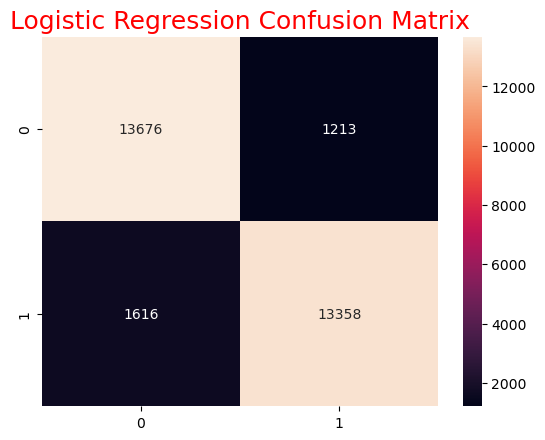

In [43]:
sns.heatmap(confusion_matrix(test_y, logreg.predict(test_x)), annot=True, fmt=".0f")
plt.title("Logistic Regression Confusion Matrix",fontsize=18, color="red");

ROC-кривая расположена близко к верхнему левому углу, что указывает на хорошую способность модели различать классы.

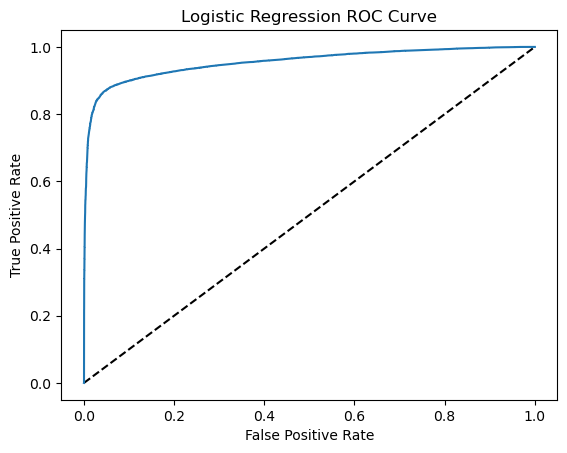

In [44]:
test_y = test_y.replace({2:1,1:0})
# Probabilities
logreg_pred_proba = logreg.predict_proba(test_x)

fpr, tpr, thresholds = roc_curve(test_y, logreg_pred_proba[:,1])
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr, tpr, label = "Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.show()

Мы использовали модель логистической регрессии для предсказания смерти пациентов. Эта модель была выбрана, так как она обычно подходит для задач классификации. В процессе мы столкнулись с проблемой дисбаланса классов, но она была решена с помощью undersampling. В итоге мы получили высокие показатели accuracy, f1, roc-auc.